In [ ]:
# Read google drive file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
np.random.seed(3)

In [ ]:
df_new = pd.read_csv('/content/gdrive/MyDrive/Project - Real Estate/pre_encoding_gurgaon_properties_post_feature_selection.csv')

In [ ]:
df_new.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,floor_category
0,flat,sector 99a,0.30,2.0,1.0,0,Relatively New,500.0,0.0,0.0,0.0,0.0,0.0,0.0,High Floor
1,flat,sector 88a,1.31,2.0,2.0,3+,Relatively New,1465.0,1.0,0.0,0.0,0.0,0.0,0.0,Mid Floor
2,house,sector 54,3.75,4.0,4.0,3,Moderately Old,1440.0,0.0,1.0,0.0,0.0,0.0,2.0,Mid Floor
3,flat,sector 37d,1.49,3.0,3.0,3,Relatively New,1707.0,0.0,0.0,0.0,0.0,1.0,0.0,High Floor
4,flat,sector 83,1.42,4.0,4.0,3,Relatively New,2000.0,1.0,1.0,0.0,0.0,0.0,0.0,Mid Floor


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3651 non-null   object 
 1   sector           3651 non-null   object 
 2   price            3651 non-null   float64
 3   bedRoom          3651 non-null   float64
 4   bathroom         3651 non-null   float64
 5   balcony          3651 non-null   object 
 6   agePossession    3651 non-null   object 
 7   built_up_area    3651 non-null   float64
 8   study room       3651 non-null   float64
 9   servant room     3651 non-null   float64
 10  store room       3651 non-null   float64
 11  pooja room       3651 non-null   float64
 12  others           3651 non-null   float64
 13  furnishing_type  3651 non-null   float64
 14  floor_category   3651 non-null   object 
dtypes: float64(10), object(5)
memory usage: 428.0+ KB


In [ ]:
# considering the features that had significant importance with price in our previous feature importance tests

# feature
# built_up_area      0.715262
# sector             0.142485
# bathroom           0.032209
# bedRoom            0.027312
# servant room       0.026869
# balcony            0.013025
# store room         0.008462
# study room         0.008419
# agePossession      0.007960
# furnishing_type    0.006171
# floor_category     0.005876
# pooja room         0.003635
# others             0.002316

In [ ]:
df_new = df_new.drop(columns= ['others', 'pooja room' , 'floor_category', 'bathroom']) #bathroom is relevant but shares close correlation with bedroom feature

In [ ]:
df_new.head()

,property_type,sector,price,bedRoom,balcony,agePossession,built_up_area,study room,servant room,store room,furnishing_type
0,flat,sector 99a,0.30,2.0,0,Relatively New,500.0,0.0,0.0,0.0,0.0
1,flat,sector 88a,1.31,2.0,3+,Relatively New,1465.0,1.0,0.0,0.0,0.0
2,house,sector 54,3.75,4.0,3,Moderately Old,1440.0,0.0,1.0,0.0,2.0
3,flat,sector 37d,1.49,3.0,3,Relatively New,1707.0,0.0,0.0,0.0,0.0
4,flat,sector 83,1.42,4.0,3,Relatively New,2000.0,1.0,1.0,0.0,0.0


In [ ]:
df_new.drop_duplicates(inplace=True)

In [ ]:
df_new.shape

(3464, 11)

In [ ]:
df_new.head()

,property_type,sector,price,bedRoom,balcony,agePossession,built_up_area,study room,servant room,store room,furnishing_type
0,flat,sector 99a,0.30,2.0,0,Relatively New,500.0,0.0,0.0,0.0,0.0
1,flat,sector 88a,1.31,2.0,3+,Relatively New,1465.0,1.0,0.0,0.0,0.0
2,house,sector 54,3.75,4.0,3,Moderately Old,1440.0,0.0,1.0,0.0,2.0
3,flat,sector 37d,1.49,3.0,3,Relatively New,1707.0,0.0,0.0,0.0,0.0
4,flat,sector 83,1.42,4.0,3,Relatively New,2000.0,1.0,1.0,0.0,0.0


In [ ]:
df_new['furnishing_type'].value_counts()
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

0.0    2271
2.0    1008
1.0     185
Name: furnishing_type, dtype: int64

In [ ]:
# int values have faster execution speed compared to float values

In [ ]:
furnishing_type_values = {0.0:0, 1.0:1, 2.0:2}
df_new['furnishing_type'] = df_new['furnishing_type'].map(furnishing_type_values)

In [ ]:
bedRoom_type_values = {1.0:1, 2.0:2, 3.0:3, 4.0:4, 5.0:5, 6.0:6, 7.0:7, 8.0:8, 9.0:9, 10.0:10, 11.0:11, 12.0:12}
df_new['bedRoom'] = df_new['bedRoom'].map(bedRoom_type_values)

In [ ]:
# bathroom_type_values = {1.0:1, 2.0:2, 3.0:3, 4.0:4, 5.0:5, 6.0:6, 7.0:7, 8.0:8, 9.0:9, 10.0:10, 11.0:11, 12.0:12}
# df_new['bathroom'] = df_new['bathroom'].map(bathroom_type_values)

In [ ]:
study_room_type_values = {0.0:0, 1.0:1}
df_new['study room'] = df_new['study room'].map(study_room_type_values)

In [ ]:
servant_room_type_values = {0.0:0, 1.0:1}
df_new['servant room'] = df_new['servant room'].map(servant_room_type_values)

In [ ]:
store_room_type_values = {0.0:0, 1.0:1}
df_new['store room'] = df_new['store room'].map(store_room_type_values)

In [ ]:
df_new.head()

,property_type,sector,price,bedRoom,balcony,agePossession,built_up_area,study room,servant room,store room,furnishing_type
0,flat,sector 99a,0.30,2,0,Relatively New,500.0,0,0,0,0
1,flat,sector 88a,1.31,2,3+,Relatively New,1465.0,1,0,0,0
2,house,sector 54,3.75,4,3,Moderately Old,1440.0,0,1,0,2
3,flat,sector 37d,1.49,3,3,Relatively New,1707.0,0,0,0,0
4,flat,sector 83,1.42,4,3,Relatively New,2000.0,1,1,0,0


In [ ]:
df_new['agePossession'].value_counts()

Relatively New        1672
Moderately Old         613
New Property           587
Old Property           319
Under Construction     273
Name: agePossession, dtype: int64

In [ ]:
agePossession_type_values = {
    'Relatively New': 'new property',
    'New Property': 'new property',
    'Moderately Old': 'old property',
    'Old Property': 'old property',
    'Under Construction' : 'under construction'
    }

df_new['agePossession'] = df_new['agePossession'].map(agePossession_type_values)

In [ ]:
df_new['agePossession'].value_counts()

new property          2259
old property           932
under construction     273
Name: agePossession, dtype: int64

In [ ]:
df_new.head()

,property_type,sector,price,bedRoom,balcony,agePossession,built_up_area,study room,servant room,store room,furnishing_type
0,flat,sector 99a,0.30,2,0,new property,500.0,0,0,0,0
1,flat,sector 88a,1.31,2,3+,new property,1465.0,1,0,0,0
2,house,sector 54,3.75,4,3,old property,1440.0,0,1,0,2
3,flat,sector 37d,1.49,3,3,new property,1707.0,0,0,0,0
4,flat,sector 83,1.42,4,3,new property,2000.0,1,1,0,0


In [ ]:
# df_new['bedRoom'] = df_new['bedRoom'].replace({7:'6+',8:'6+', 9:'6+', 10:'6+', 11:'6+', 12:'6+' })

In [ ]:
# df_new['bathroom'] = df_new['bathroom'].replace({7:'6+',8:'6+', 9:'6+', 10:'6+', 11:'6+', 12:'6+' })

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3464 entries, 0 to 3650
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3464 non-null   object 
 1   sector           3464 non-null   object 
 2   price            3464 non-null   float64
 3   bedRoom          3464 non-null   int64  
 4   balcony          3464 non-null   object 
 5   agePossession    3464 non-null   object 
 6   built_up_area    3464 non-null   float64
 7   study room       3464 non-null   int64  
 8   servant room     3464 non-null   int64  
 9   store room       3464 non-null   int64  
 10  furnishing_type  3464 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 324.8+ KB


In [ ]:
df_new['property_type'] = df_new['property_type'].replace({'flat': 'Flat', 'house': 'House'})

In [ ]:
df_new = pd.get_dummies(df_new, columns=['property_type','sector','balcony', 'agePossession'], drop_first=True)

In [ ]:
df_new.head()

,price,bedRoom,built_up_area,study room,servant room,store room,furnishing_type,property_type_House,sector_sector 102,sector_sector 103,sector_sector 104,sector_sector 105,sector_sector 106,sector_sector 107,sector_sector 108,sector_sector 109,sector_sector 10a,sector_sector 11,sector_sector 110,sector_sector 111,sector_sector 112,sector_sector 113,sector_sector 12,sector_sector 13,sector_sector 14,sector_sector 15,sector_sector 17,sector_sector 17b,sector_sector 2,sector_sector 21,sector_sector 22,sector_sector 23,sector_sector 24,sector_sector 25,sector_sector 26,sector_sector 28,sector_sector 3,sector_sector 30,sector_sector 31,sector_sector 33,sector_sector 36,sector_sector 36a,sector_sector 37c,sector_sector 37d,sector_sector 38,sector_sector 39,sector_sector 4,sector_sector 40,sector_sector 41,sector_sector 43,sector_sector 45,sector_sector 46,sector_sector 47,sector_sector 48,sector_sector 49,sector_sector 5,sector_sector 50,sector_sector 51,sector_sector 52,sector_sector 53,sector_sector 54,sector_sector 55,sector_sector 56,sector_sector 57,sector_sector 58,sector_sector 59,sector_sector 6,sector_sector 60,sector_sector 61,sector_sector 62,sector_sector 63,sector_sector 63a,sector_sector 65,sector_sector 66,sector_sector 67,sector_sector 67a,sector_sector 68,sector_sector 69,sector_sector 7,sector_sector 70,sector_sector 70a,sector_sector 71,sector_sector 72,sector_sector 73,sector_sector 74,sector_sector 76,sector_sector 77,sector_sector 78,sector_sector 79,sector_sector 8,sector_sector 80,sector_sector 81,sector_sector 82,sector_sector 82a,sector_sector 83,sector_sector 84,sector_sector 85,sector_sector 86,sector_sector 88a,sector_sector 88b,sector_sector 89,sector_sector 9,sector_sector 90,sector_sector 91,sector_sector 92,sector_sector 93,sector_sector 95,sector_sector 99,sector_sector 99a,sector_sector 9a,sector_sector nearby dwarka expressway,sector_sector nearby gwal pahari,sector_sector nearby manesar,sector_sector nearby sohna road,balcony_1,balcony_2,balcony_3,balcony_3+,agePossession_old property,agePossession_under construction
0,0.30,2,500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.31,2,1465.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3.75,4,1440.0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1.49,3,1707.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1.42,4,2000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X = df_new.drop(columns=['price'])
y = df_new['price']

<ipython-input-49-0f415a98584e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='price', ylabel='Density'>

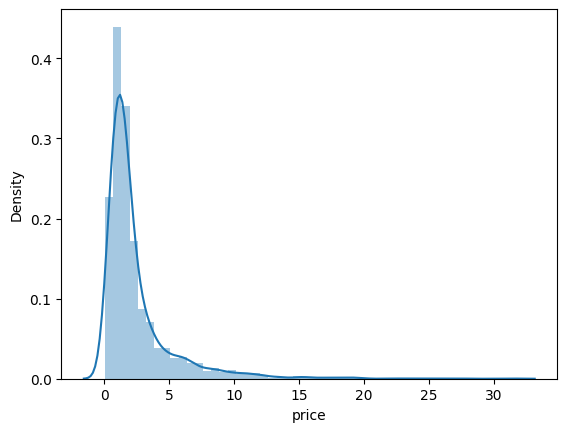

In [ ]:
sns.distplot(y)

In [ ]:
# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

<ipython-input-51-aa92e888da11>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_transformed)


<Axes: xlabel='price', ylabel='Density'>

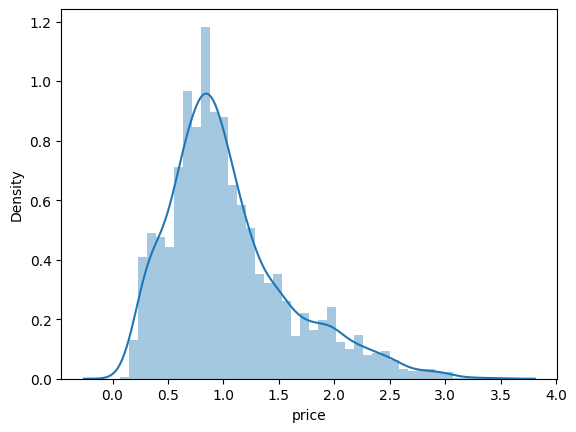

In [ ]:
sns.distplot(y_transformed)

In [ ]:
# # K-fold cross-validation
# kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# scores = cross_val_score(LinearRegression(), X_scaled, y_transformed, cv=kfold, scoring='r2')

In [ ]:
# scores.mean(), scores.std()

In [ ]:
# sns.distplot(scores)

In [ ]:
df_new.head()

,price,bedRoom,built_up_area,study room,servant room,store room,furnishing_type,property_type_House,sector_sector 102,sector_sector 103,sector_sector 104,sector_sector 105,sector_sector 106,sector_sector 107,sector_sector 108,sector_sector 109,sector_sector 10a,sector_sector 11,sector_sector 110,sector_sector 111,sector_sector 112,sector_sector 113,sector_sector 12,sector_sector 13,sector_sector 14,sector_sector 15,sector_sector 17,sector_sector 17b,sector_sector 2,sector_sector 21,sector_sector 22,sector_sector 23,sector_sector 24,sector_sector 25,sector_sector 26,sector_sector 28,sector_sector 3,sector_sector 30,sector_sector 31,sector_sector 33,sector_sector 36,sector_sector 36a,sector_sector 37c,sector_sector 37d,sector_sector 38,sector_sector 39,sector_sector 4,sector_sector 40,sector_sector 41,sector_sector 43,sector_sector 45,sector_sector 46,sector_sector 47,sector_sector 48,sector_sector 49,sector_sector 5,sector_sector 50,sector_sector 51,sector_sector 52,sector_sector 53,sector_sector 54,sector_sector 55,sector_sector 56,sector_sector 57,sector_sector 58,sector_sector 59,sector_sector 6,sector_sector 60,sector_sector 61,sector_sector 62,sector_sector 63,sector_sector 63a,sector_sector 65,sector_sector 66,sector_sector 67,sector_sector 67a,sector_sector 68,sector_sector 69,sector_sector 7,sector_sector 70,sector_sector 70a,sector_sector 71,sector_sector 72,sector_sector 73,sector_sector 74,sector_sector 76,sector_sector 77,sector_sector 78,sector_sector 79,sector_sector 8,sector_sector 80,sector_sector 81,sector_sector 82,sector_sector 82a,sector_sector 83,sector_sector 84,sector_sector 85,sector_sector 86,sector_sector 88a,sector_sector 88b,sector_sector 89,sector_sector 9,sector_sector 90,sector_sector 91,sector_sector 92,sector_sector 93,sector_sector 95,sector_sector 99,sector_sector 99a,sector_sector 9a,sector_sector nearby dwarka expressway,sector_sector nearby gwal pahari,sector_sector nearby manesar,sector_sector nearby sohna road,balcony_1,balcony_2,balcony_3,balcony_3+,agePossession_old property,agePossession_under construction
0,0.30,2,500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.31,2,1465.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3.75,4,1440.0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1.49,3,1707.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1.42,4,2000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.3,random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
# # Create a Lasso regression model
# lasso_model = Lasso(alpha=1.0)
# ridge_model = Ridge(alpha=0.0001)

In [ ]:
# lr.fit(X_train,y_train)

In [ ]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# X_train.head()

In [ ]:
# y_pred = lr.predict(X_test)

In [ ]:
# r2 = round(r2_score(np.expm1(y_test), y_pred),4)
# r2

In [ ]:
# lr.coef_

In [ ]:
# lr.intercept_

In [ ]:
# X_test.shape

In [ ]:
# coef_df = pd.DataFrame(lr.coef_.reshape(1,119),columns=X.columns).stack().reset_index().drop(columns=['level_0']).rename(columns={'level_1':'feature',0:'coef'})

In [ ]:
# coef_df

In [ ]:
# Rescaling using MinMaxCcaler
scaler = StandardScaler()
num_cols= ['built_up_area', 'bedRoom']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [ ]:
X_train.head()

,bedRoom,built_up_area,study room,servant room,store room,furnishing_type,property_type_House,sector_sector 102,sector_sector 103,sector_sector 104,sector_sector 105,sector_sector 106,sector_sector 107,sector_sector 108,sector_sector 109,sector_sector 10a,sector_sector 11,sector_sector 110,sector_sector 111,sector_sector 112,sector_sector 113,sector_sector 12,sector_sector 13,sector_sector 14,sector_sector 15,sector_sector 17,sector_sector 17b,sector_sector 2,sector_sector 21,sector_sector 22,sector_sector 23,sector_sector 24,sector_sector 25,sector_sector 26,sector_sector 28,sector_sector 3,sector_sector 30,sector_sector 31,sector_sector 33,sector_sector 36,sector_sector 36a,sector_sector 37c,sector_sector 37d,sector_sector 38,sector_sector 39,sector_sector 4,sector_sector 40,sector_sector 41,sector_sector 43,sector_sector 45,sector_sector 46,sector_sector 47,sector_sector 48,sector_sector 49,sector_sector 5,sector_sector 50,sector_sector 51,sector_sector 52,sector_sector 53,sector_sector 54,sector_sector 55,sector_sector 56,sector_sector 57,sector_sector 58,sector_sector 59,sector_sector 6,sector_sector 60,sector_sector 61,sector_sector 62,sector_sector 63,sector_sector 63a,sector_sector 65,sector_sector 66,sector_sector 67,sector_sector 67a,sector_sector 68,sector_sector 69,sector_sector 7,sector_sector 70,sector_sector 70a,sector_sector 71,sector_sector 72,sector_sector 73,sector_sector 74,sector_sector 76,sector_sector 77,sector_sector 78,sector_sector 79,sector_sector 8,sector_sector 80,sector_sector 81,sector_sector 82,sector_sector 82a,sector_sector 83,sector_sector 84,sector_sector 85,sector_sector 86,sector_sector 88a,sector_sector 88b,sector_sector 89,sector_sector 9,sector_sector 90,sector_sector 91,sector_sector 92,sector_sector 93,sector_sector 95,sector_sector 99,sector_sector 99a,sector_sector 9a,sector_sector nearby dwarka expressway,sector_sector nearby gwal pahari,sector_sector nearby manesar,sector_sector nearby sohna road,balcony_1,balcony_2,balcony_3,balcony_3+,agePossession_old property,agePossession_under construction
1053,-0.874123,-0.901108,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1643,-0.067547,0.027930,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3279,-0.067547,0.289222,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2963,0.739028,0.502933,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3067,-0.874123,-0.835785,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
rfe = RFE(lr)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Checking which parameters have been selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('bedRoom', False, 31),
 ('built_up_area', True, 1),
 ('study room', False, 52),
 ('servant room', True, 1),
 ('store room', False, 33),
 ('furnishing_type', False, 59),
 ('property_type_House', True, 1),
 ('sector_sector 102', True, 1),
 ('sector_sector 103', False, 28),
 ('sector_sector 104', False, 20),
 ('sector_sector 105', True, 1),
 ('sector_sector 106', False, 15),
 ('sector_sector 107', False, 37),
 ('sector_sector 108', True, 1),
 ('sector_sector 109', True, 1),
 ('sector_sector 10a', True, 1),
 ('sector_sector 11', False, 30),
 ('sector_sector 110', False, 5),
 ('sector_sector 111', True, 1),
 ('sector_sector 112', True, 1),
 ('sector_sector 113', True, 1),
 ('sector_sector 12', False, 53),
 ('sector_sector 13', False, 29),
 ('sector_sector 14', True, 1),
 ('sector_sector 15', True, 1),
 ('sector_sector 17', False, 34),
 ('sector_sector 17b', True, 1),
 ('sector_sector 2', False, 2),
 ('sector_sector 21', False, 49),
 ('sector_sector 22', True, 1),
 ('sector_sector 23', Fal

In [ ]:
# storing the selected 15 variables in col list
rfe_support = X_train.columns[rfe.support_]
rfe_support

Index(['built_up_area', 'servant room', 'property_type_House', 'sector_sector 102', 'sector_sector 105', 'sector_sector 108', 'sector_sector 109', 'sector_sector 10a', 'sector_sector 111', 'sector_sector 112', 'sector_sector 113', 'sector_sector 14', 'sector_sector 15', 'sector_sector 17b', 'sector_sector 22', 'sector_sector 24', 'sector_sector 25', 'sector_sector 26', 'sector_sector 28', 'sector_sector 30', 'sector_sector 31', 'sector_sector 33', 'sector_sector 36a', 'sector_sector 38', 'sector_sector 39', 'sector_sector 40', 'sector_sector 41', 'sector_sector 43', 'sector_sector 45', 'sector_sector 46', 'sector_sector 47', 'sector_sector 48', 'sector_sector 49', 'sector_sector 50', 'sector_sector 53', 'sector_sector 54', 'sector_sector 55', 'sector_sector 57', 'sector_sector 58', 'sector_sector 59', 'sector_sector 6', 'sector_sector 60', 'sector_sector 61', 'sector_sector 62', 'sector_sector 63', 'sector_sector 63a', 'sector_sector 65', 'sector_sector 66', 'sector_sector 67',
       

In [ ]:
# checking which columns have been eleminated
X_train.columns[~rfe.support_]

Index(['bedRoom', 'study room', 'store room', 'furnishing_type', 'sector_sector 103', 'sector_sector 104', 'sector_sector 106', 'sector_sector 107', 'sector_sector 11', 'sector_sector 110', 'sector_sector 12', 'sector_sector 13', 'sector_sector 17', 'sector_sector 2', 'sector_sector 21', 'sector_sector 23', 'sector_sector 3', 'sector_sector 36', 'sector_sector 37c', 'sector_sector 37d', 'sector_sector 4', 'sector_sector 5', 'sector_sector 51', 'sector_sector 52', 'sector_sector 56', 'sector_sector 68', 'sector_sector 7', 'sector_sector 70', 'sector_sector 71', 'sector_sector 73', 'sector_sector 76', 'sector_sector 77', 'sector_sector 78', 'sector_sector 79', 'sector_sector 80', 'sector_sector 81', 'sector_sector 82', 'sector_sector 83', 'sector_sector 84', 'sector_sector 85', 'sector_sector 86', 'sector_sector 88b', 'sector_sector 89', 'sector_sector 9', 'sector_sector 90', 'sector_sector 91', 'sector_sector 92', 'sector_sector 93', 'sector_sector 95', 'sector_sector 99',
       'secto

In [ ]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     123.0
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:16:37   Log-Likelihood:                 416.69
No. Observations:                2424   AIC:                            -593.4
Df Residuals:                    2304   BIC:                             101.8
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
#Drop the constant term DF
X_train_lm1.drop(['const'], axis=1, inplace=True)

In [ ]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
calculateVIF(X_train_lm1)

,Features,VIF
116,balcony_3+,10.31
115,balcony_3,9.01
114,balcony_2,6.88
113,balcony_1,3.65
6,property_type_House,3.05
117,agePossession_old property,2.82
3,servant room,2.62
0,bedRoom,2.27
112,sector_sector nearby sohna road,2.14
1,built_up_area,2.09


In [ ]:
# checking by each features with OLS stats
high_p_value_dfe = ['balcony_3+', 'balcony_3','sector_sector 107', 'sector_sector 12', 'sector_sector 17', 'sector_sector 21', 'sector_sector 3', 'sector_sector 36', 'sector_sector 4', 'sector_sector nearby sohna road',
                    'sector_sector 11', 'sector_sector 13', 'sector_sector 37c', 'sector_sector 5', 'sector_sector 9', 'sector_sector 51', 'sector_sector 7', 'sector_sector 8', 'sector_sector 9a',
                    'sector_sector 84', 'sector_sector 88b', 'sector_sector 93', 'sector_sector nearby manesar', 'sector_sector 6', 'sector_sector 99a', 'sector_sector 92', 'sector_sector 95', 'sector_sector 73',
                    'sector_sector 80', 'sector_sector 91', 'sector_sector nearby dwarka expressway', 'sector_sector 90', 'sector_sector 78' ]

In [ ]:
# Dropping the features
X_train_lm2 = X_train_lm1.drop(high_p_value_dfe, axis = 1)

In [ ]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_lm2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     168.2
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:16:49   Log-Likelihood:                 389.09
No. Observations:                2424   AIC:                            -604.2
Df Residuals:                    2337   BIC:                            -100.2
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
#Drop the constant term DF
X_train_lm3.drop(['const'], axis=1, inplace=True)

In [ ]:
calculateVIF(X_train_lm3)

,Features,VIF
3,servant room,2.27
6,property_type_House,2.26
84,agePossession_old property,2.18
0,bedRoom,2.07
1,built_up_area,1.96
5,furnishing_type,1.89
2,study room,1.48
83,balcony_2,1.45
4,store room,1.41
85,agePossession_under construction,1.40


In [ ]:
pipeline = Pipeline([
    ('regression', Linear_Regression(max_iter=1000), )
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     168.2
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:48:33   Log-Likelihood:                 389.09
No. Observations:                2424   AIC:                            -604.2
Df Residuals:                    2337   BIC:                            -100.2
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
y_train_pred = lr4.predict(X_train_lm4)

In [ ]:
y_train_pred = np.expm1(y_train_pred)

<ipython-input-74-6df07fc405dc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((np.expm1(y_train) - y_train_pred), bins = 20)


<Figure size 640x480 with 0 Axes>

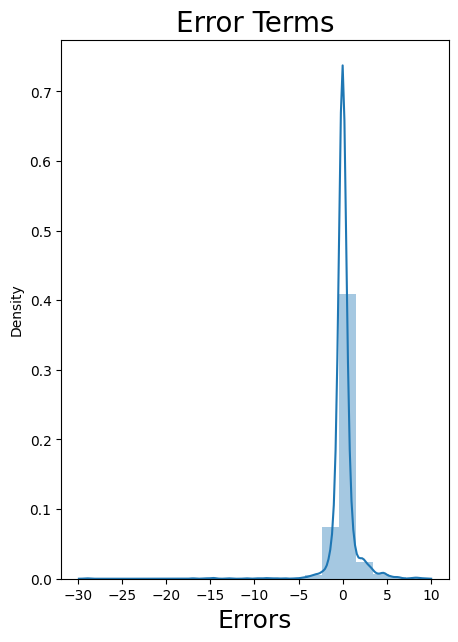

In [ ]:
fig = plt.figure()
plt.figure(figsize=(5,7))
sns.distplot((np.expm1(y_train) - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

Text(0, 0.5, 'y_pred')

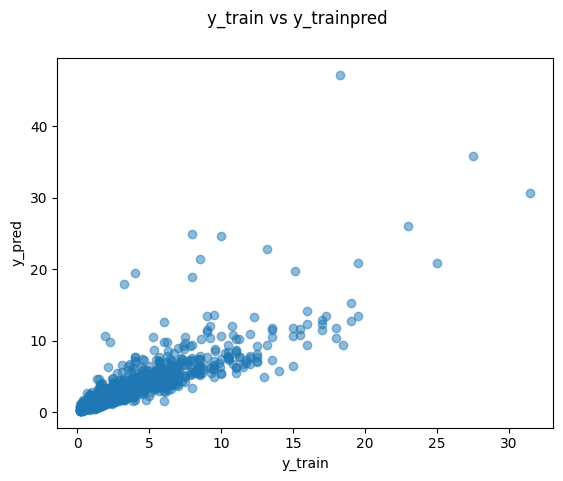

In [ ]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(np.expm1(y_train), y_train_pred,alpha = 0.5)
fig.suptitle('y_train vs y_trainpred')
plt.xlabel('y_train')
plt.ylabel('y_pred')

In [ ]:
lr4.params

const                               0.708357
bedRoom                             0.088720
built_up_area                       0.213814
study room                          0.025610
servant room                        0.119583
store room                          0.065110
furnishing_type                     0.011129
property_type_House                 0.290062
sector_sector 102                   0.276450
sector_sector 103                   0.091408
sector_sector 104                   0.130693
sector_sector 105                  -0.171774
sector_sector 106                   0.153767
sector_sector 108                   0.255130
sector_sector 109                   0.285389
sector_sector 10a                   0.313003
sector_sector 110                   0.221516
sector_sector 111                   0.357258
sector_sector 112                   0.460874
sector_sector 113                   0.405327
sector_sector 14                    0.637546
sector_sector 15                    0.359915
sector_sec

In [ ]:
# testing

In [ ]:
num_cols= ['built_up_area', 'bedRoom']
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_test.head()

,bedRoom,built_up_area,study room,servant room,store room,furnishing_type,property_type_House,sector_sector 102,sector_sector 103,sector_sector 104,sector_sector 105,sector_sector 106,sector_sector 107,sector_sector 108,sector_sector 109,sector_sector 10a,sector_sector 11,sector_sector 110,sector_sector 111,sector_sector 112,sector_sector 113,sector_sector 12,sector_sector 13,sector_sector 14,sector_sector 15,sector_sector 17,sector_sector 17b,sector_sector 2,sector_sector 21,sector_sector 22,sector_sector 23,sector_sector 24,sector_sector 25,sector_sector 26,sector_sector 28,sector_sector 3,sector_sector 30,sector_sector 31,sector_sector 33,sector_sector 36,sector_sector 36a,sector_sector 37c,sector_sector 37d,sector_sector 38,sector_sector 39,sector_sector 4,sector_sector 40,sector_sector 41,sector_sector 43,sector_sector 45,sector_sector 46,sector_sector 47,sector_sector 48,sector_sector 49,sector_sector 5,sector_sector 50,sector_sector 51,sector_sector 52,sector_sector 53,sector_sector 54,sector_sector 55,sector_sector 56,sector_sector 57,sector_sector 58,sector_sector 59,sector_sector 6,sector_sector 60,sector_sector 61,sector_sector 62,sector_sector 63,sector_sector 63a,sector_sector 65,sector_sector 66,sector_sector 67,sector_sector 67a,sector_sector 68,sector_sector 69,sector_sector 7,sector_sector 70,sector_sector 70a,sector_sector 71,sector_sector 72,sector_sector 73,sector_sector 74,sector_sector 76,sector_sector 77,sector_sector 78,sector_sector 79,sector_sector 8,sector_sector 80,sector_sector 81,sector_sector 82,sector_sector 82a,sector_sector 83,sector_sector 84,sector_sector 85,sector_sector 86,sector_sector 88a,sector_sector 88b,sector_sector 89,sector_sector 9,sector_sector 90,sector_sector 91,sector_sector 92,sector_sector 93,sector_sector 95,sector_sector 99,sector_sector 99a,sector_sector 9a,sector_sector nearby dwarka expressway,sector_sector nearby gwal pahari,sector_sector nearby manesar,sector_sector nearby sohna road,balcony_1,balcony_2,balcony_3,balcony_3+,agePossession_old property,agePossession_under construction
3213,-0.874123,-0.489009,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
412,-0.874123,-0.627719,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3346,-0.067547,-0.272072,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1619,-0.874123,-0.423686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1308,-0.067547,-0.264007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_train_lm4.columns

Index(['const', 'bedRoom', 'built_up_area', 'study room', 'servant room', 'store room', 'furnishing_type', 'property_type_House', 'sector_sector 102', 'sector_sector 103', 'sector_sector 104', 'sector_sector 105', 'sector_sector 106', 'sector_sector 108', 'sector_sector 109', 'sector_sector 10a', 'sector_sector 110', 'sector_sector 111', 'sector_sector 112', 'sector_sector 113', 'sector_sector 14', 'sector_sector 15', 'sector_sector 17b', 'sector_sector 2', 'sector_sector 22', 'sector_sector 23', 'sector_sector 24', 'sector_sector 25', 'sector_sector 26', 'sector_sector 28', 'sector_sector 30', 'sector_sector 31', 'sector_sector 33', 'sector_sector 36a', 'sector_sector 37d', 'sector_sector 38', 'sector_sector 39', 'sector_sector 40', 'sector_sector 41', 'sector_sector 43', 'sector_sector 45', 'sector_sector 46', 'sector_sector 47', 'sector_sector 48', 'sector_sector 49', 'sector_sector 50', 'sector_sector 52', 'sector_sector 53', 'sector_sector 54', 'sector_sector 55',
       'sector_s

In [ ]:
import copy
X_train_lm5 = copy.deepcopy(X_train_lm4)

In [ ]:
X_train_lm4.drop(['const'], axis=1, inplace=True)

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm4.columns]

# Adding a constant variable
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,bedRoom,built_up_area,study room,servant room,store room,furnishing_type,property_type_House,sector_sector 102,sector_sector 103,sector_sector 104,sector_sector 105,sector_sector 106,sector_sector 108,sector_sector 109,sector_sector 10a,sector_sector 110,sector_sector 111,sector_sector 112,sector_sector 113,sector_sector 14,sector_sector 15,sector_sector 17b,sector_sector 2,sector_sector 22,sector_sector 23,sector_sector 24,sector_sector 25,sector_sector 26,sector_sector 28,sector_sector 30,sector_sector 31,sector_sector 33,sector_sector 36a,sector_sector 37d,sector_sector 38,sector_sector 39,sector_sector 40,sector_sector 41,sector_sector 43,sector_sector 45,sector_sector 46,sector_sector 47,sector_sector 48,sector_sector 49,sector_sector 50,sector_sector 52,sector_sector 53,sector_sector 54,sector_sector 55,sector_sector 56,sector_sector 57,sector_sector 58,sector_sector 59,sector_sector 60,sector_sector 61,sector_sector 62,sector_sector 63,sector_sector 63a,sector_sector 65,sector_sector 66,sector_sector 67,sector_sector 67a,sector_sector 68,sector_sector 69,sector_sector 70,sector_sector 70a,sector_sector 71,sector_sector 72,sector_sector 74,sector_sector 76,sector_sector 77,sector_sector 79,sector_sector 81,sector_sector 82,sector_sector 82a,sector_sector 83,sector_sector 85,sector_sector 86,sector_sector 88a,sector_sector 89,sector_sector 99,sector_sector nearby gwal pahari,balcony_1,balcony_2,agePossession_old property,agePossession_under construction
3213,1.0,-0.874123,-0.489009,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
412,1.0,-0.874123,-0.627719,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3346,1.0,-0.067547,-0.272072,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1619,1.0,-0.874123,-0.423686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1308,1.0,-0.067547,-0.264007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test_new1.loc[3213]

const                               1.000000
bedRoom                            -0.874123
built_up_area                      -0.489009
study room                          0.000000
servant room                        0.000000
store room                          0.000000
furnishing_type                     0.000000
property_type_House                 0.000000
sector_sector 102                   0.000000
sector_sector 103                   0.000000
sector_sector 104                   1.000000
sector_sector 105                   0.000000
sector_sector 106                   0.000000
sector_sector 108                   0.000000
sector_sector 109                   0.000000
sector_sector 10a                   0.000000
sector_sector 110                   0.000000
sector_sector 111                   0.000000
sector_sector 112                   0.000000
sector_sector 113                   0.000000
sector_sector 14                    0.000000
sector_sector 15                    0.000000
sector_sec

In [ ]:
df_new.loc[3213]

price                                        0.9
bedRoom                                      2.0
built_up_area                             1259.0
study room                                   0.0
servant room                                 0.0
store room                                   0.0
furnishing_type                              0.0
property_type_House                          0.0
sector_sector 102                            0.0
sector_sector 103                            0.0
sector_sector 104                            1.0
sector_sector 105                            0.0
sector_sector 106                            0.0
sector_sector 107                            0.0
sector_sector 108                            0.0
sector_sector 109                            0.0
sector_sector 10a                            0.0
sector_sector 11                             0.0
sector_sector 110                            0.0
sector_sector 111                            0.0
sector_sector 112   

In [ ]:
X_test_new1.shape

(1040, 87)

In [ ]:
X_train_lm4.shape

(2424, 86)

In [ ]:
X_train_lm5.shape

(2424, 87)

In [ ]:
# Making predictions
y_pred = lr4.predict(X_test_new1)

In [ ]:
y_test_pred = np.expm1(y_pred)

In [ ]:
#Evaluate R-square for test
r2_score(np.expm1(y_test),y_test_pred)

0.7319786869078436

<ipython-input-92-8fe3d20cae29>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((np.expm1(y_test) - y_test_pred), bins = 20)


<Figure size 640x480 with 0 Axes>

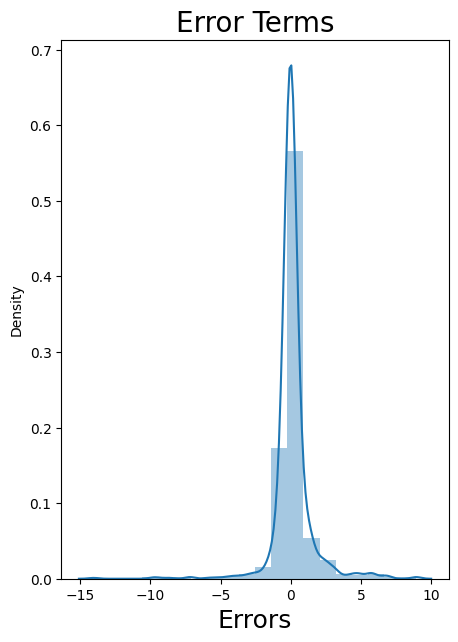

In [ ]:
fig = plt.figure()
plt.figure(figsize=(5,7))
sns.distplot((np.expm1(y_test) - y_test_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

Text(0, 0.5, 'y_test_pred')

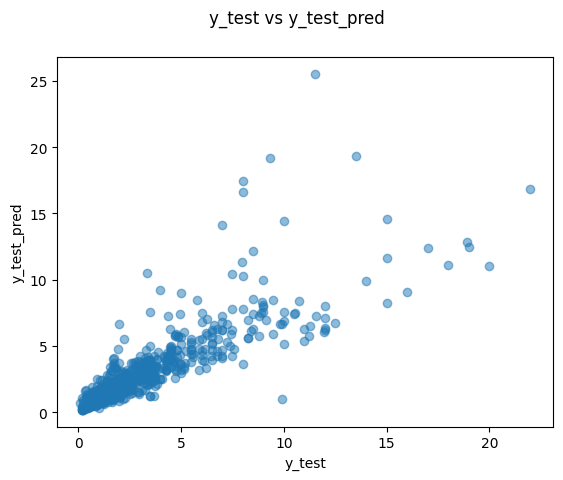

In [ ]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(np.expm1(y_test), y_test_pred,alpha = 0.5)
fig.suptitle('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

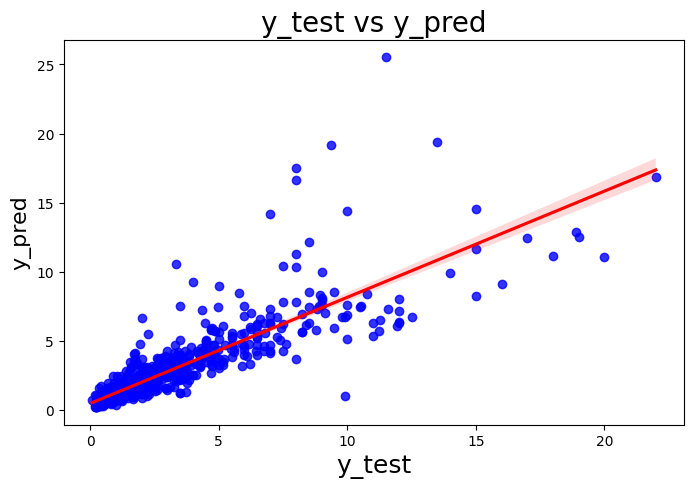

In [ ]:
#Regression plot
plt.figure(figsize=(8,5))
sns.regplot(x=np.expm1(y_test), y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [ ]:
X_test_new1.head()

,const,bedRoom,built_up_area,study room,servant room,store room,furnishing_type,property_type_House,sector_sector 102,sector_sector 103,sector_sector 104,sector_sector 105,sector_sector 106,sector_sector 108,sector_sector 109,sector_sector 10a,sector_sector 110,sector_sector 111,sector_sector 112,sector_sector 113,sector_sector 14,sector_sector 15,sector_sector 17b,sector_sector 2,sector_sector 22,sector_sector 23,sector_sector 24,sector_sector 25,sector_sector 26,sector_sector 28,sector_sector 30,sector_sector 31,sector_sector 33,sector_sector 36a,sector_sector 37d,sector_sector 38,sector_sector 39,sector_sector 40,sector_sector 41,sector_sector 43,sector_sector 45,sector_sector 46,sector_sector 47,sector_sector 48,sector_sector 49,sector_sector 50,sector_sector 52,sector_sector 53,sector_sector 54,sector_sector 55,sector_sector 56,sector_sector 57,sector_sector 58,sector_sector 59,sector_sector 60,sector_sector 61,sector_sector 62,sector_sector 63,sector_sector 63a,sector_sector 65,sector_sector 66,sector_sector 67,sector_sector 67a,sector_sector 68,sector_sector 69,sector_sector 70,sector_sector 70a,sector_sector 71,sector_sector 72,sector_sector 74,sector_sector 76,sector_sector 77,sector_sector 79,sector_sector 81,sector_sector 82,sector_sector 82a,sector_sector 83,sector_sector 85,sector_sector 86,sector_sector 88a,sector_sector 89,sector_sector 99,sector_sector nearby gwal pahari,balcony_1,balcony_2,agePossession_old property,agePossession_under construction
3213,1.0,-0.874123,-0.489009,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
412,1.0,-0.874123,-0.627719,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3346,1.0,-0.067547,-0.272072,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1619,1.0,-0.874123,-0.423686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1308,1.0,-0.067547,-0.264007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
val = [[1.0,1,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]

In [ ]:
cols = ['const', 'bedRoom', 'built_up_area', 'study room', 'servant room', 'store room', 'furnishing_type', 'property_type_House', 'sector_sector 102', 'sector_sector 103', 'sector_sector 104', 'sector_sector 105', 'sector_sector 106', 'sector_sector 108', 'sector_sector 109', 'sector_sector 10a', 'sector_sector 110', 'sector_sector 111', 'sector_sector 112', 'sector_sector 113', 'sector_sector 14', 'sector_sector 15', 'sector_sector 17b', 'sector_sector 2', 'sector_sector 22', 'sector_sector 23', 'sector_sector 24', 'sector_sector 25', 'sector_sector 26', 'sector_sector 28', 'sector_sector 30', 'sector_sector 31', 'sector_sector 33', 'sector_sector 36a', 'sector_sector 37d', 'sector_sector 38', 'sector_sector 39', 'sector_sector 40', 'sector_sector 41', 'sector_sector 43', 'sector_sector 45', 'sector_sector 46', 'sector_sector 47', 'sector_sector 48', 'sector_sector 49', 'sector_sector 50', 'sector_sector 52', 'sector_sector 53', 'sector_sector 54', 'sector_sector 55','sector_sector 56', 'sector_sector 57', 'sector_sector 58', 'sector_sector 59', 'sector_sector 60', 'sector_sector 61', 'sector_sector 62', 'sector_sector 63', 'sector_sector 63a', 'sector_sector 65', 'sector_sector 66', 'sector_sector 67', 'sector_sector 67a', 'sector_sector 68', 'sector_sector 69', 'sector_sector 70', 'sector_sector 70a', 'sector_sector 71', 'sector_sector 72', 'sector_sector 74', 'sector_sector 76', 'sector_sector 77', 'sector_sector 79', 'sector_sector 81', 'sector_sector 82', 'sector_sector 82a', 'sector_sector 83', 'sector_sector 85', 'sector_sector 86', 'sector_sector 88a', 'sector_sector 89', 'sector_sector 99', 'sector_sector nearby gwal pahari', 'balcony_1', 'balcony_2', 'agePossession_old property', 'agePossession_under construction']

In [ ]:
one_df = pd.DataFrame(val, columns=cols)

In [ ]:
one_df

,const,bedRoom,built_up_area,study room,servant room,store room,furnishing_type,property_type_House,sector_sector 102,sector_sector 103,sector_sector 104,sector_sector 105,sector_sector 106,sector_sector 108,sector_sector 109,sector_sector 10a,sector_sector 110,sector_sector 111,sector_sector 112,sector_sector 113,sector_sector 14,sector_sector 15,sector_sector 17b,sector_sector 2,sector_sector 22,sector_sector 23,sector_sector 24,sector_sector 25,sector_sector 26,sector_sector 28,sector_sector 30,sector_sector 31,sector_sector 33,sector_sector 36a,sector_sector 37d,sector_sector 38,sector_sector 39,sector_sector 40,sector_sector 41,sector_sector 43,sector_sector 45,sector_sector 46,sector_sector 47,sector_sector 48,sector_sector 49,sector_sector 50,sector_sector 52,sector_sector 53,sector_sector 54,sector_sector 55,sector_sector 56,sector_sector 57,sector_sector 58,sector_sector 59,sector_sector 60,sector_sector 61,sector_sector 62,sector_sector 63,sector_sector 63a,sector_sector 65,sector_sector 66,sector_sector 67,sector_sector 67a,sector_sector 68,sector_sector 69,sector_sector 70,sector_sector 70a,sector_sector 71,sector_sector 72,sector_sector 74,sector_sector 76,sector_sector 77,sector_sector 79,sector_sector 81,sector_sector 82,sector_sector 82a,sector_sector 83,sector_sector 85,sector_sector 86,sector_sector 88a,sector_sector 89,sector_sector 99,sector_sector nearby gwal pahari,balcony_1,balcony_2,agePossession_old property,agePossession_under construction
0,1.0,1,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
num_cols= ['built_up_area', 'bedRoom']
one_df[num_cols] = scaler.transform(one_df[num_cols])

In [ ]:
one_df

,const,bedRoom,built_up_area,study room,servant room,store room,furnishing_type,property_type_House,sector_sector 102,sector_sector 103,sector_sector 104,sector_sector 105,sector_sector 106,sector_sector 108,sector_sector 109,sector_sector 10a,sector_sector 110,sector_sector 111,sector_sector 112,sector_sector 113,sector_sector 14,sector_sector 15,sector_sector 17b,sector_sector 2,sector_sector 22,sector_sector 23,sector_sector 24,sector_sector 25,sector_sector 26,sector_sector 28,sector_sector 30,sector_sector 31,sector_sector 33,sector_sector 36a,sector_sector 37d,sector_sector 38,sector_sector 39,sector_sector 40,sector_sector 41,sector_sector 43,sector_sector 45,sector_sector 46,sector_sector 47,sector_sector 48,sector_sector 49,sector_sector 50,sector_sector 52,sector_sector 53,sector_sector 54,sector_sector 55,sector_sector 56,sector_sector 57,sector_sector 58,sector_sector 59,sector_sector 60,sector_sector 61,sector_sector 62,sector_sector 63,sector_sector 63a,sector_sector 65,sector_sector 66,sector_sector 67,sector_sector 67a,sector_sector 68,sector_sector 69,sector_sector 70,sector_sector 70a,sector_sector 71,sector_sector 72,sector_sector 74,sector_sector 76,sector_sector 77,sector_sector 79,sector_sector 81,sector_sector 82,sector_sector 82a,sector_sector 83,sector_sector 85,sector_sector 86,sector_sector 88a,sector_sector 89,sector_sector 99,sector_sector nearby gwal pahari,balcony_1,balcony_2,agePossession_old property,agePossession_under construction
0,1.0,-2.487273,-1.504337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
lr4.predict(one_df)

0    0.254841
dtype: float64

In [ ]:
const = 0.708357

In [ ]:
b0x = 0.088720 * (-2.487273 + (0.806575 * 5))

In [ ]:
b1x = 0.213814 * (-1.504337 + (0.000806 * 1000))

In [ ]:
const + b0x + b1x

0.6961685821220001

In [ ]:
# bedroom

# 0 =  -2.487273 --- difference	 0.806575
# 1 =  -1.680698 --- difference	 0.806575
# 2 =  -0.874123 --- difference	 0.806575
# 3 =  -0.067547

# 0.088720 * -2.487273 + (0.806575 * 0)

# at 0 zero unit the built_up_area coeffient is -2.487273, difference btw each unit increase is 0.806575

# built_up_area

#  0 = -1.504337	--- difference 0.000806
#  1 = -1.503531 --- difference	 0.000807
#  2 = -1.502724 --- difference	 0.000806
#  3 = -1.501918 --- difference	 0.000807
# 4 =  -1.501111

# at 0 zero unit the built_up_area coeffient is -1.504337, difference btw each unit increase is -0.0008065


In [ ]:
# when we perform one-hot encoding and drop the first column (dummy variable), the information from that dropped column is captured in the intercept term of the model. In other words, the dropped column becomes the reference category, and the coefficients for the remaining dummy variables represent the difference in the outcome compared to this reference category.

# For example, let's say you have a categorical variable with three levels: A, B, and C. After one-hot encoding, you have two dummy variables: dummy_B and dummy_C. If you drop dummy_B, the model might look something like this:

# Y = \beta_0 + \beta_1 \cdot \text{dummy_C} + \epsilon

In [ ]:
fn_coef_df = pd.DataFrame(lr4.params.to_numpy().reshape(1,-1),columns=X_train_lm5.columns).stack().reset_index().drop(columns=['level_0']).rename(columns={'level_1':'feature',0:'coef'})

In [ ]:
fn_coef_df

,feature,coef
0,const,0.708357
1,bedRoom,0.088720
2,built_up_area,0.213814
3,study room,0.025610
4,servant room,0.119583
5,store room,0.065110
6,furnishing_type,0.011129
7,property_type_House,0.290062
8,sector_sector 102,0.276450
9,sector_sector 103,0.091408


In [ ]:
#  DataFrame
data = {
    'feature': ['const','bedRoom', 'built_up_area', 'study room', 'servant room', 'store room', 'furnishing_type',
                'property_type_House', 'sector_sector 102', 'sector_sector 103', 'sector_sector 104',
                'sector_sector 105', 'sector_sector 106', 'sector_sector 108', 'sector_sector 109',
                'sector_sector 10a', 'sector_sector 110', 'sector_sector 111', 'sector_sector 112',
                'sector_sector 113', 'sector_sector 14', 'sector_sector 15', 'sector_sector 17b',
                'sector_sector 2', 'sector_sector 22', 'sector_sector 23', 'sector_sector 24',
                'sector_sector 25', 'sector_sector 26', 'sector_sector 28', 'sector_sector 30',
                'sector_sector 31', 'sector_sector 33', 'sector_sector 36a', 'sector_sector 37d',
                'sector_sector 38', 'sector_sector 39', 'sector_sector 40', 'sector_sector 41',
                'sector_sector 43', 'sector_sector 45', 'sector_sector 46', 'sector_sector 47',
                'sector_sector 48', 'sector_sector 49', 'sector_sector 50', 'sector_sector 52',
                'sector_sector 53', 'sector_sector 54', 'sector_sector 55', 'sector_sector 56',
                'sector_sector 57', 'sector_sector 58', 'sector_sector 59', 'sector_sector 60',
                'sector_sector 61', 'sector_sector 62', 'sector_sector 63', 'sector_sector 63a',
                'sector_sector 65', 'sector_sector 66', 'sector_sector 67', 'sector_sector 67a',
                'sector_sector 68', 'sector_sector 69', 'sector_sector 70', 'sector_sector 70a',
                'sector_sector 71', 'sector_sector 72', 'sector_sector 74', 'sector_sector 76',
                'sector_sector 77', 'sector_sector 79', 'sector_sector 81', 'sector_sector 82',
                'sector_sector 82a', 'sector_sector 83', 'sector_sector 85', 'sector_sector 86',
                'sector_sector 88a', 'sector_sector 89', 'sector_sector 99', 'sector_sector nearby gwal pahari',
                'balcony_1', 'balcony_2', 'agePossession_old property', 'agePossession_under construction'],
    'coef': [0.708357, 0.088720, 0.213814, 0.025610, 0.119583, 0.065110, 0.011129, 0.290062, 0.276450, 0.091408,
             0.130693, -0.171774, 0.153767, 0.255130, 0.285389, 0.313003, 0.221516, 0.357258, 0.460874, 0.405327,
             0.637546, 0.359915, 0.523883, 0.255421, 0.587804, 0.195161, 0.407907, 0.706048, 0.769977, 0.602982,
             0.387621, 0.567578, 0.311504, 0.401390, 0.112146, 0.432025, 0.328372, 0.339857, 0.418264, 0.608279,
             0.822601, 0.435707, 0.403549, 0.572096, 0.430869, 0.666655, 0.163866, 0.865225, 0.791740, 0.360896,
             0.233112, 0.425440, 0.735888, 0.882993, 0.473807, 0.477326, 0.713641, 0.692495, 0.470980, 0.535813,
             0.617453, 0.479980, 0.281818, 0.214149, 0.287967, 0.191509, 0.263254, 0.097539, 0.442942, 0.421667,
             0.202716, 0.103970, 0.189305, 0.237545, 0.126745, 0.258732, 0.104532, 0.176770, 0.125451, 0.225180,
             0.120722, 0.137171, 0.229995, -0.132485, -0.036423, -0.046062, 0.051598]
}

# constant value : 0.247254

In [ ]:
# Create a dictionary from the data
coef_dict = dict(zip(data['feature'], data['coef']))

In [ ]:
import pickle

with open('Insight_coeff_dict.pkl', 'wb') as file:
    pickle.dump(coef_dict, file)

In [ ]:
# Example: Get the coefficient for the 'bedRoom' feature
bedroom_coef = coef_dict['agePossession_under construction']
print("Coefficient for 'bedRoom':", bedroom_coef)

Coefficient for 'bedRoom': 0.051598


In [ ]:
df_new.iloc[3213]

price                                        6.0
bedRoom                                      3.0
built_up_area                             2983.0
study room                                   0.0
servant room                                 1.0
store room                                   0.0
furnishing_type                              0.0
property_type_House                          0.0
sector_sector 102                            0.0
sector_sector 103                            0.0
sector_sector 104                            0.0
sector_sector 105                            0.0
sector_sector 106                            0.0
sector_sector 107                            0.0
sector_sector 108                            0.0
sector_sector 109                            0.0
sector_sector 10a                            0.0
sector_sector 11                             0.0
sector_sector 110                            0.0
sector_sector 111                            0.0
sector_sector 112   

In [ ]:
df_new.iloc[1]

price                                        1.31
bedRoom                                      2.00
built_up_area                             1465.00
study room                                   1.00
servant room                                 0.00
store room                                   0.00
furnishing_type                              0.00
property_type_House                          0.00
sector_sector 102                            0.00
sector_sector 103                            0.00
sector_sector 104                            0.00
sector_sector 105                            0.00
sector_sector 106                            0.00
sector_sector 107                            0.00
sector_sector 108                            0.00
sector_sector 109                            0.00
sector_sector 10a                            0.00
sector_sector 11                             0.00
sector_sector 110                            0.00
sector_sector 111                            0.00


In [ ]:
    data =   [[property_type, sector, bedRoom, bathroom, balcony, agePossession, built_up_area, servant_room, store_room, furnishing_type, floor_category]]
    columns = ['property_type', 'sector', 'bedRoom', 'bathroom', 'balcony', 'agePossession', 'built_up_area', 'servant_room', 'store_room', 'furnishing_type', 'floor_category']
    one_df = pd.DataFrame(data, columns=columns)

    # predict

    base_price = np.expm1(pipeline.predict(one_df))[0]